# eRNA count matrix analysis

In [4]:
.libPaths()
Sys.getenv("LD_LIBRARY_PATH")
library(Seurat)

Attaching SeuratObject
‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed
‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


In [12]:

if (interactive()){
  setwd("/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA")
}
  


In [13]:
# read count matrix
erna_exrs_matrix <- read.table("GSE126074_SNARE_seq/06_count_eRNA/erna_exrs_matrix.tsv", header = TRUE, sep = "\t", row.names = 1)


In [14]:
erna_exrs_matrix[1:10,1:10]

              AAAAACGGCCTG AAAACACTCCTG AAAACCGGTACC AAAACGCCTTTC AAAAGTGTCACG AAAATTCGATCA AAACATCCCAGC AAACCATTCTTC AAACCCATGTAC AAACCGCCATAT
ENSR10_73CRCM            0            0            0            0            0            0            0            0            0            0
ENSR10_73R2M6            0            0            0            0            0            0            0            0            0            0
ENSR10_744KHP            0            0            0            0            0            0            0            0            0            0
ENSR10_74JXL6            0            0            0            0            0            0            0            0            0            0
ENSR10_755P8K            0            0            0            0            0            0            0            0            0            0
ENSR10_75GLKG            0            0            0            0            0            0            0            0            0      

In [15]:
# remove rows that are not eRNAs
ro_remove =  c("__no_feature", "__ambiguous", "__too_low_aQual", 
"__not_aligned", "__alignment_not_unique")
erna_exrs_matrix <- erna_exrs_matrix[!rownames(erna_exrs_matrix) %in% ro_remove, ]

In [16]:
dim(erna_exrs_matrix)

[1] 42331  1047

In [17]:
# unexpressed cells count
unexpr_cells = colSums(erna_exrs_matrix==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(erna_exrs_matrix))," out of ", ncol(erna_exrs_matrix))
# unexpssed rows count
unexpr_rows = rowSums(erna_exrs_matrix==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(erna_exrs_matrix))," out of ", nrow(erna_exrs_matrix))



In [18]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(erna_exrs_matrix == 0) / (nrow(erna_exrs_matrix) * ncol(erna_exrs_matrix))))

# number of cells with more than 0 counts
print(paste0("number of cells with more than 0 counts: ", sum(colSums(erna_exrs_matrix) > 0)))

# number of eRNAs with more than 0 counts
print(paste0("number of eRNAs with more than 0 counts: ", sum(rowSums(erna_exrs_matrix) > 0)))


[1] " precent of zeros: 0.999991358411854"
[1] "number of cells with more than 0 counts: 317"
[1] "number of eRNAs with more than 0 counts: 336"


In [19]:
# filter the matrix to only include expressed eRNAs and cells with more than 0 counts
expressed_erna_exrs_matrix <- erna_exrs_matrix[rowSums(erna_exrs_matrix) > 0,colSums(erna_exrs_matrix) > 0]

In [20]:
# show first 100 sums of cells
colSums(expressed_erna_exrs_matrix) %>% head(100)

AAACCGCCATAT AAACGAAAAGTC AAAGTGCCACAT AAATACGCCAAG AAATCGATGAAT AAATTCAGGCGG AACATCCCTGAG AACCATAGTTAG AACCCACGTGGT AACGTCCTACTA AACTAGCCAAAG AACTCAGTTATG AACTTGGGACTT AAGCCTGTTGTA AAGCTGGACGAT 
           1            1            2            1            1            1            1            1            1            1            1            1            1            1            1 
AAGGAGAAATGT AAGGGTGCTAAC AAGGTGTCTCCA AAGTCGATCAAC AATAAATCTATC AATCTATGTCGC AATTTGGGAGCA ACAAATAACAGT ACAGAGAGGACA ACCCGGGAACGA ACCCTGGAAACC ACCCTGGAGACG ACCGGTAGCTGA ACCGTTTCTCTC ACGCTTATGACC 
           1            1            2            1            1            2            1            2            1            1            2            1            1            1            2 
ACGTCATCCGTA ACGTTCCGAGAA ACTAAAGGCCTC ACTCCGTTCACT ACTGCCTATGGA ACTTACAGCGTG ACTTGACTTGGC ACTTGGTTCAAG ACTTTCTAATCA AGAGAAGGTTCC AGATGGGCCGAA AGCACCGTATTT AGCCAATACCCT AGCCCCTCACGC AGCCTTAGAACA 
           1        

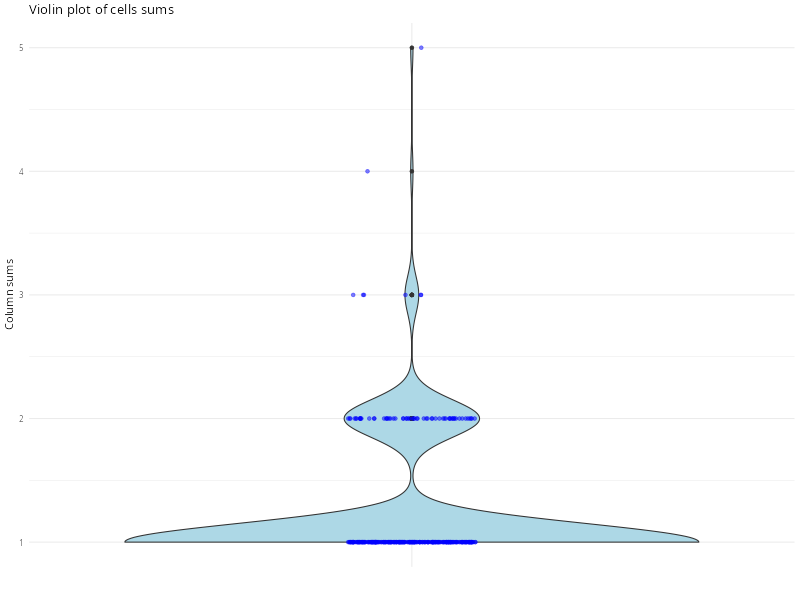

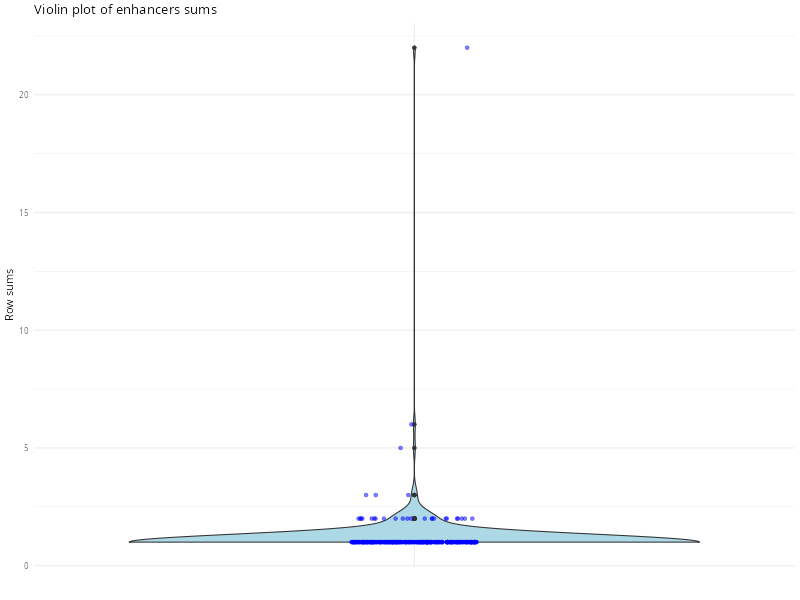

In [21]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(expressed_erna_exrs_matrix))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(expressed_erna_exrs_matrix))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
p




  Var1 Freq
1    1  250
2    2   59
3    3    6
4    4    1
5    5    1
  Var1 Freq
1    1  307
2    2   23
3    3    3
4    5    1
5    6    1
6   22    1


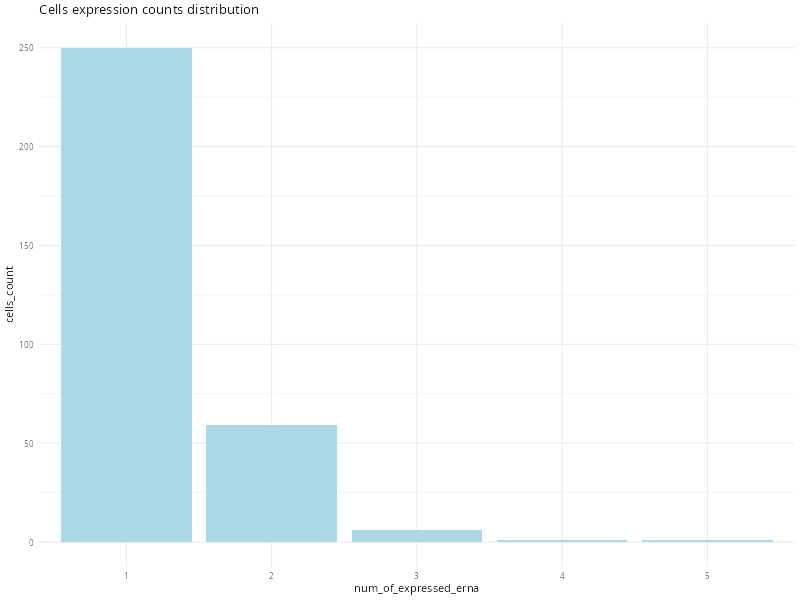

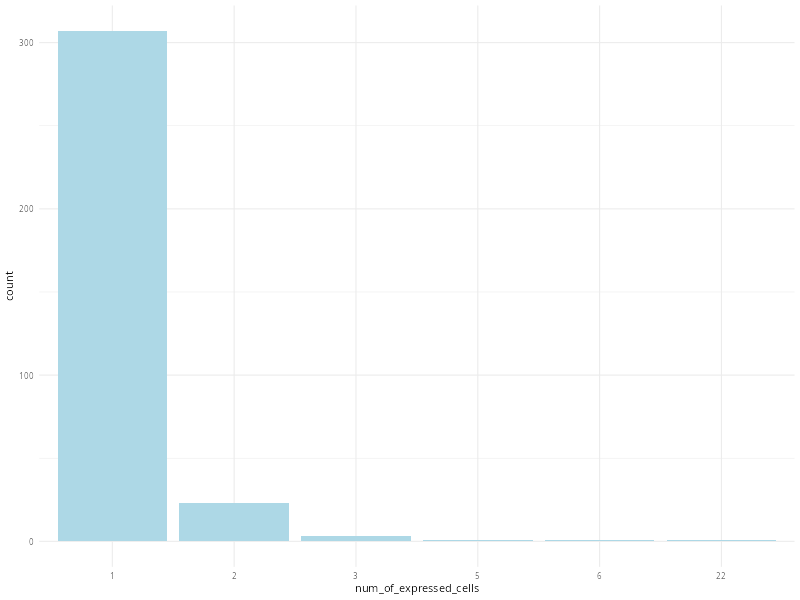

In [22]:
#bar plot of rows distribution
table_data = as.data.frame(table(data_cols$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_erna", "cells_count")
table_data$expression = as.factor(table_data$num_of_expressed_erna)
p = ggplot(table_data, aes(x = num_of_expressed_erna, y = cells_count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Cells expression counts distribution") +
  theme_minimal()

p

# bar plot of  cells distribution
table_data = as.data.frame(table(data_rows$sum))
print(table_data)
colnames(table_data) = c("num_of_expressed_cells", "count")
table_data$expression = as.factor(table_data$num_of_expressed_cells)
p = ggplot(table_data, aes(x = num_of_expressed_cells, y = count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  theme_minimal()
p 




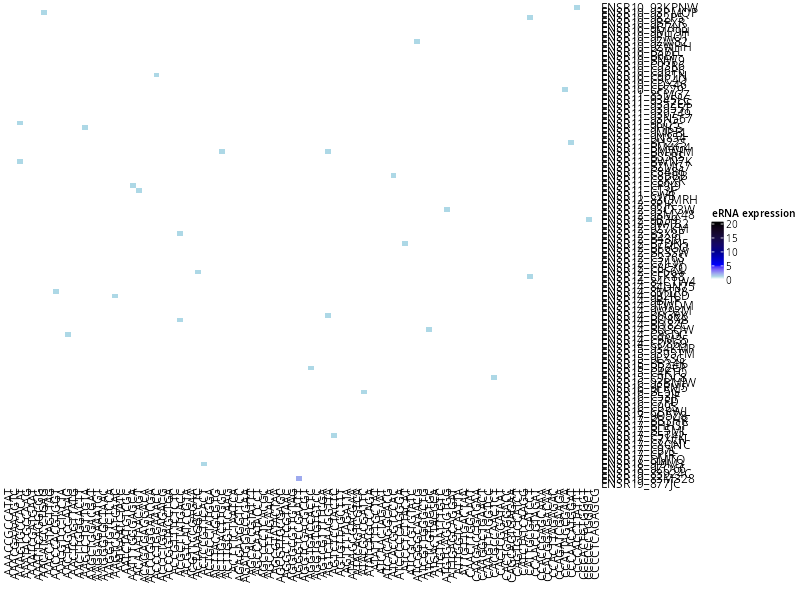

In [ ]:
#complex heatmap of the matrix
library(ComplexHeatmap)
library(circlize)
p = Heatmap(as.matrix(expressed_erna_exrs_matrix[1:100,1:100]), name = "eRNA expression", col = colorRamp2(c(0, 1, 5, 10, 20),
 c("white", "lightblue", "blue", "darkblue", "black")), show_row_names = T, show_column_names = T, cluster_rows = F, cluster_columns = F,)
p